Differential Privacy Method

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
wine_data = pd.read_csv("winequality-red.csv")

In [22]:
wine_data.shape

(1599, 12)

In [4]:
# Standardize the features
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data)

In [5]:
# Compute sensitivity (maximum absolute change in feature value)
sensitivity = np.max(wine_data_scaled, axis=0) - np.min(wine_data_scaled, axis=0)

In [6]:
# Define the epsilon for differential privacy
epsilon = 1.0  # Adjust as needed

In [7]:
# Calculate scale parameter for Laplace noise
scale = sensitivity / epsilon

In [8]:
# Generate Laplace noise for each feature
laplace_noise = np.random.laplace(scale=scale, size=wine_data_scaled.shape)

In [9]:
# Add Laplace noise to the standardized data
wine_data_noisy = wine_data_scaled + laplace_noise

In [10]:
# Reverse standardization to obtain the differentially private dataset
wine_data_private = scaler.inverse_transform(wine_data_noisy)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

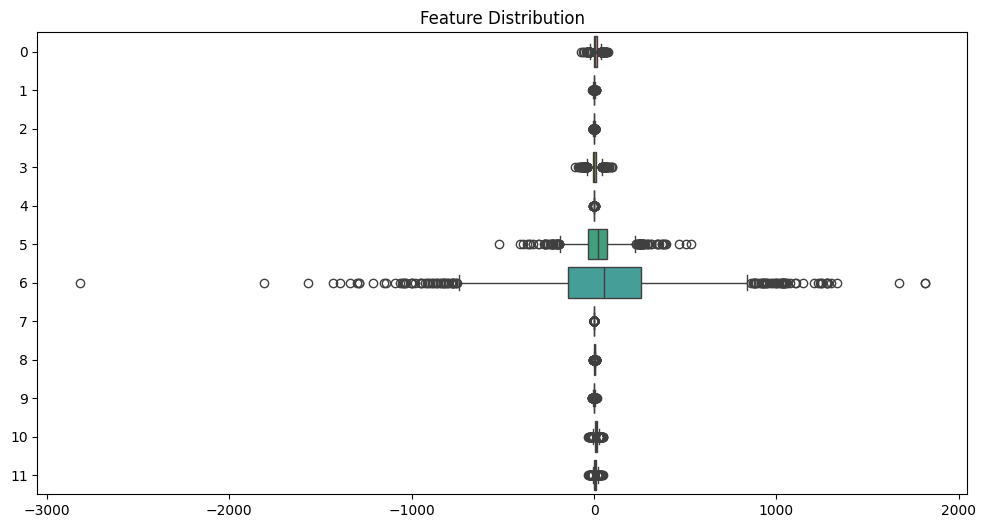

In [16]:
# Visualize the distribution of each feature using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=wine_data_private, orient="h")
plt.title('Feature Distribution')
plt.show()

In [17]:
wine_data_private

array([[-1.5354049 ,  1.08607846, -0.19644975, ..., -0.37333136,
        26.70737612,  7.46236607],
       [ 4.45845664,  0.84134511, -0.30805665, ...,  4.0762929 ,
         9.78913902, 26.90213196],
       [22.93057837,  3.21292352,  2.52067833, ...,  0.37696444,
         7.29680018,  8.23425272],
       ...,
       [15.35587724,  2.80899981,  3.43490067, ...,  2.27563906,
        12.18998668, 12.99019188],
       [ 5.08620302,  1.63642883, -0.13226577, ...,  0.94347869,
        13.22242472, 14.1657559 ],
       [41.07679073,  0.95285325,  1.90403776, ...,  0.12934477,
        12.73720325,  9.56209623]])

In [19]:
df=pd.DataFrame(wine_data_private)

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.535405,1.086078,-0.196450,10.338476,-1.331162,1.455729,-2818.379370,1.005509,4.345698,-0.373331,26.707376,7.462366
1,4.458457,0.841345,-0.308057,3.742462,0.272709,-76.561064,-38.168635,1.019622,3.442443,4.076293,9.789139,26.902132
2,22.930578,3.212924,2.520678,2.742903,-0.397841,57.293029,-122.608294,0.996186,3.574690,0.376964,7.296800,8.234253
3,52.294530,-4.263869,0.645463,21.530605,-1.021150,150.498839,-209.893283,0.980879,1.397518,-0.700374,4.084383,11.629585
4,24.120091,-1.435389,1.814319,1.269282,-2.630595,85.378736,771.015455,1.015391,3.114914,-0.950870,8.586729,14.060178


In [23]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
1594,9.171416,0.932789,-0.104342,1.774886,-1.189001,70.206288,36.599150,1.003220,3.413805,-2.306129,17.924737,2.771506
1595,-3.474486,1.917085,-2.005494,-4.781847,0.248896,99.005613,290.930810,0.979956,4.395320,1.816503,15.676705,8.163878
1596,15.355877,2.809000,3.434901,42.957635,-1.507867,127.181841,105.824362,0.997949,3.474062,2.275639,12.189987,12.990192
1597,5.086203,1.636429,-0.132266,6.706663,0.082498,21.283269,405.101399,1.024890,4.985045,0.943479,13.222425,14.165756
1598,41.076791,0.952853,1.904038,5.977861,-0.701088,24.177315,-366.452919,0.995147,0.934914,0.129345,12.737203,9.562096


K-Means

In [43]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Function to calculate within-cluster sum of squares (WCSS)
def calculate_wcss(data, max_clusters=10):
    wcss = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

In [45]:
# Calculate WCSS for different number of clusters
wcss_values = calculate_wcss(wine_data_private)

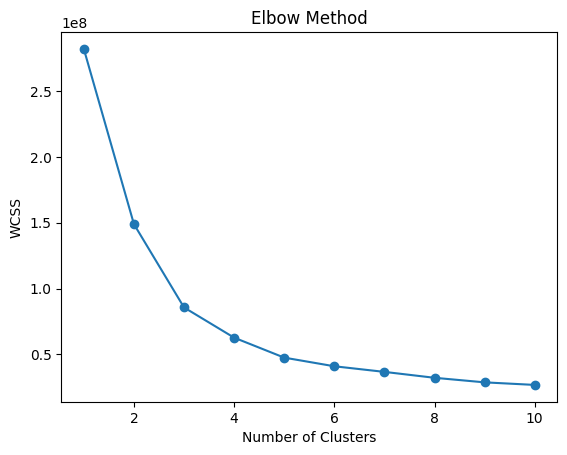

In [46]:
# Plot the elbow method to determine the optimal number of clusters
plt.plot(range(1, len(wcss_values) + 1), wcss_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

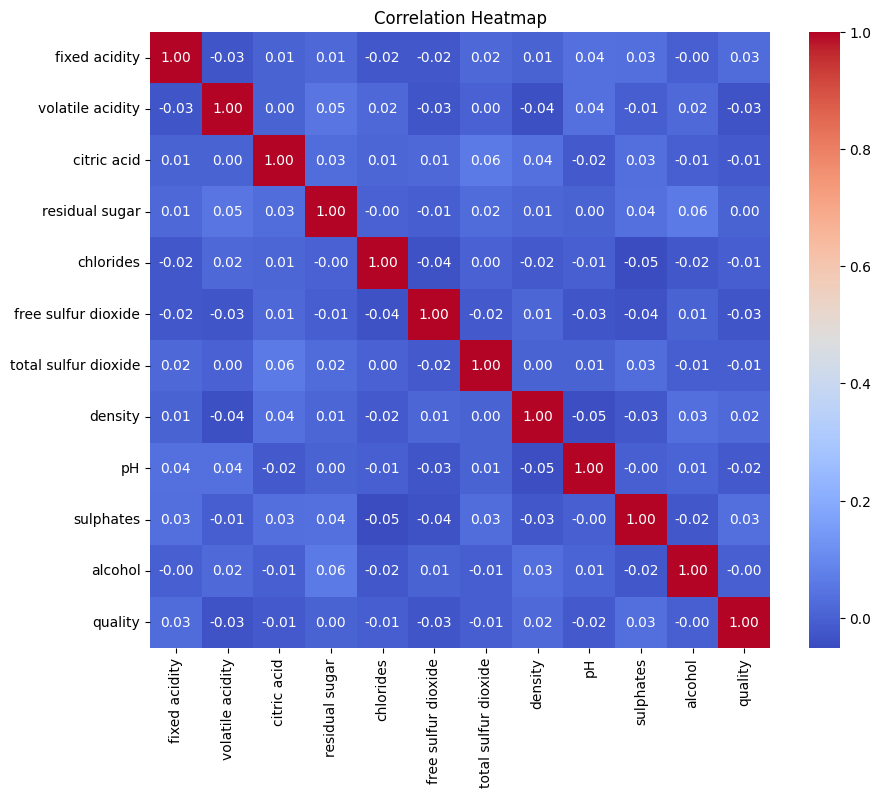

In [47]:

# Convert the NumPy array to a DataFrame
wine_df_private = pd.DataFrame(wine_data_private, columns=wine_data.columns)

# Visualize the correlation between features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wine_df_private.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [48]:
# Selecting features for clustering
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 
                     'residual sugar', 'chlorides', 'free sulfur dioxide', 
                     'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [49]:
# Extracting selected features
X = wine_data_private[:, wine_data.columns.isin(selected_features)]

In [50]:
# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

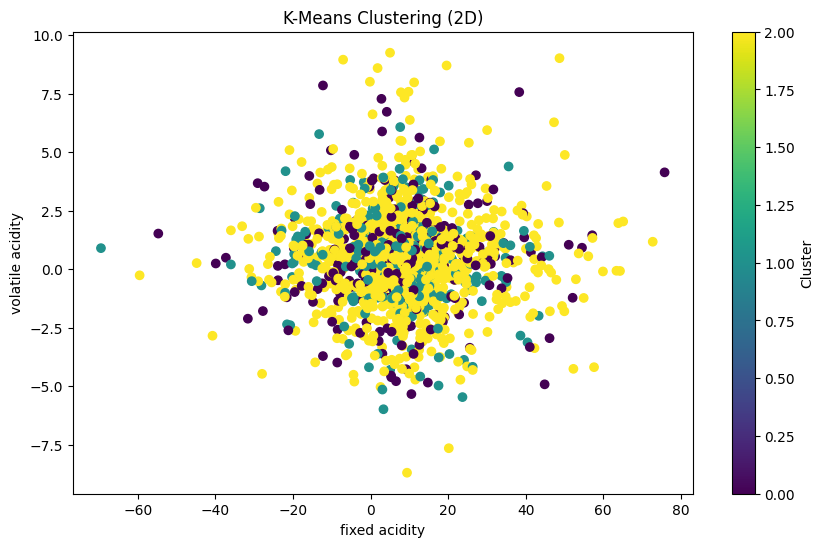

In [51]:
# Plot clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('K-Means Clustering (2D)')
plt.colorbar(label='Cluster')
plt.show()

In [52]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette Score
silhouette = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.47686227932622144


In [53]:
# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)

Davies-Bouldin Index: 0.6830761879843198


In [54]:
# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

Calinski-Harabasz Index: 1834.784080087446


Hierarchical Clustering

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [56]:
#df-->wine data private dataframe

# Select the features for clustering
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                     'pH', 'sulphates', 'alcohol']

In [73]:
# Convert wine_data_private to a DataFrame
wine_data_private_df = pd.DataFrame(data=wine_data_private, columns=wine_data.columns)

# Check the DataFrame
print(wine_data_private_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -1.535405          1.086078    -0.196450       10.338476  -1.331162   
1       4.458457          0.841345    -0.308057        3.742462   0.272709   
2      22.930578          3.212924     2.520678        2.742903  -0.397841   
3      52.294530         -4.263869     0.645463       21.530605  -1.021150   
4      24.120091         -1.435389     1.814319        1.269282  -2.630595   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             1.455729          -2818.379370  1.005509  4.345698  -0.373331   
1           -76.561064            -38.168635  1.019622  3.442443   4.076293   
2            57.293029           -122.608294  0.996186  3.574690   0.376964   
3           150.498839           -209.893283  0.980879  1.397518  -0.700374   
4            85.378736            771.015455  1.015391  3.114914  -0.950870   

     alcohol    quality  
0  26.707376   7.462366  
1   

In [74]:
# Now you can use selected_features to index the DataFrame
X = wine_data_private_df[selected_features]

In [75]:
# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')

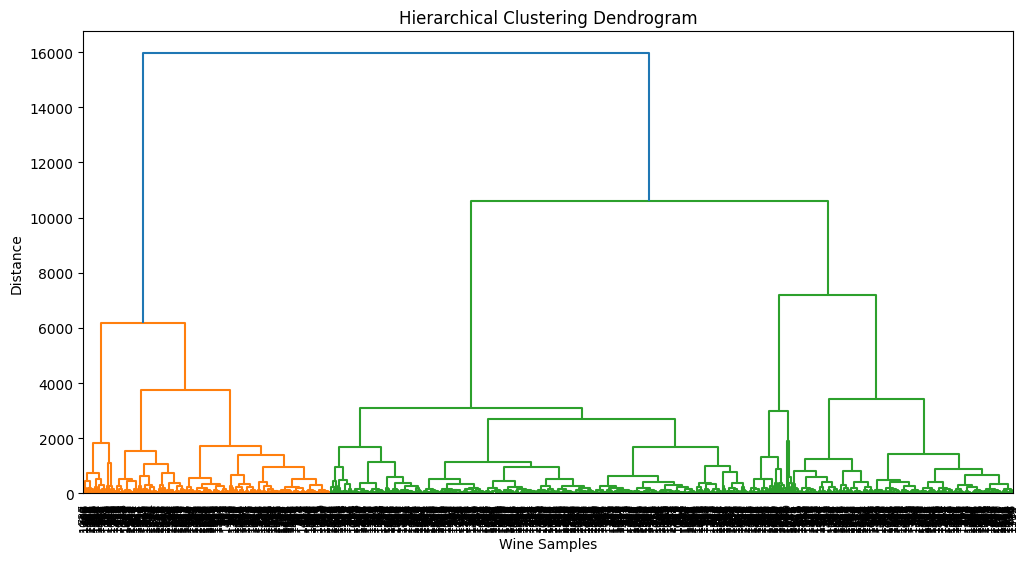

In [77]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=wine_data_private_df.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Wine Samples')
plt.ylabel('Distance')
plt.show()

In [78]:
# Perform agglomerative hierarchical clustering
num_clusters = 3  # Adjust as needed
cluster_labels = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit_predict(X)

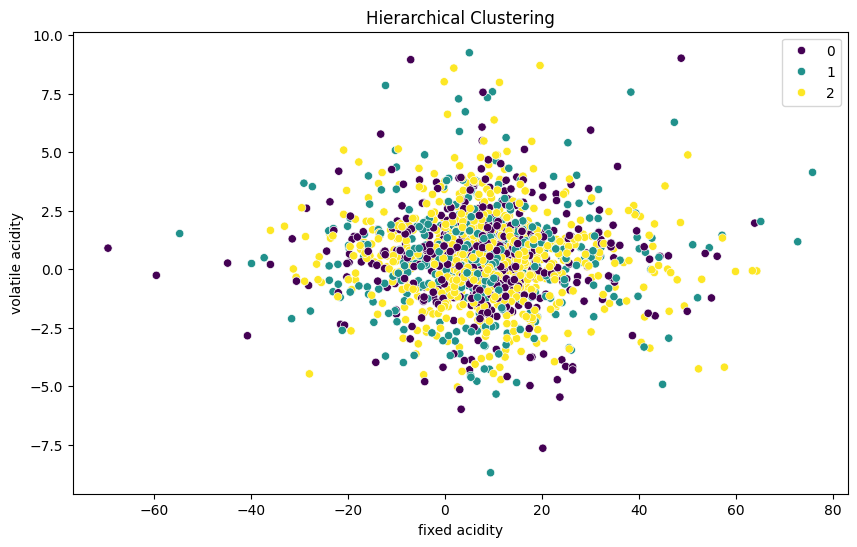

In [79]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.show()

In [82]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Compute silhouette score
silhouette = silhouette_score(X, cluster_labels)

# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, cluster_labels)

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X, cluster_labels)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)


Silhouette Score: 0.3653347454644782
Davies-Bouldin Index: 0.8205098018586098
Calinski-Harabasz Index: 1484.631652955905


_________________________________________________

DBSCAN

_________________________________________________

In [83]:
from sklearn.cluster import DBSCAN

In [84]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(wine_data_scaled)

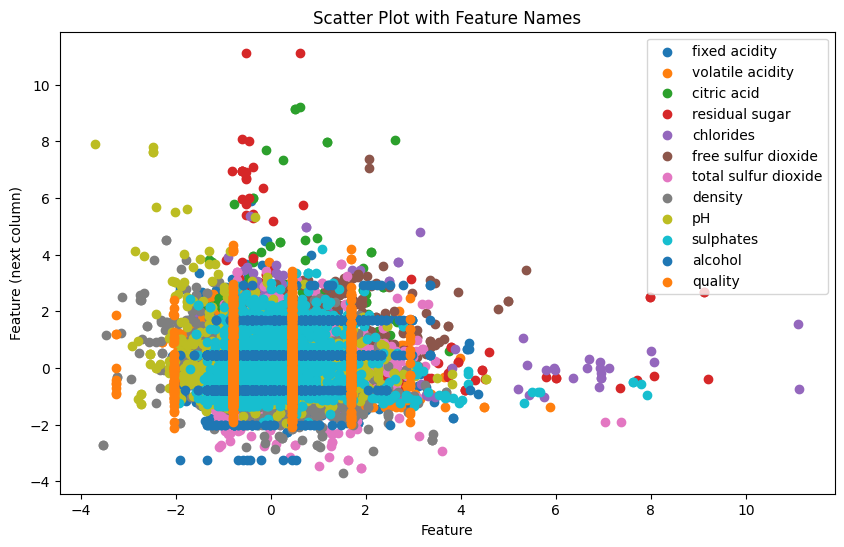

In [86]:
# Scatter plot with feature names as column names
plt.figure(figsize=(10, 6))
for i in range(wine_data_scaled.shape[1]):
    plt.scatter(wine_data_scaled[:, i], wine_data_scaled[:, (i+1) % wine_data_scaled.shape[1]], label=wine_data.columns[i])

    
    plt.xlabel('Feature')
plt.ylabel('Feature (next column)')
plt.title('Scatter Plot with Feature Names')
plt.legend()
plt.show()

In [87]:
# Extract the "fixed acidity" and "volatile acidity" features
fixed_acidity = wine_data_private[:, wine_data.columns.get_loc('fixed acidity')]
volatile_acidity = wine_data_private[:, wine_data.columns.get_loc('volatile acidity')]

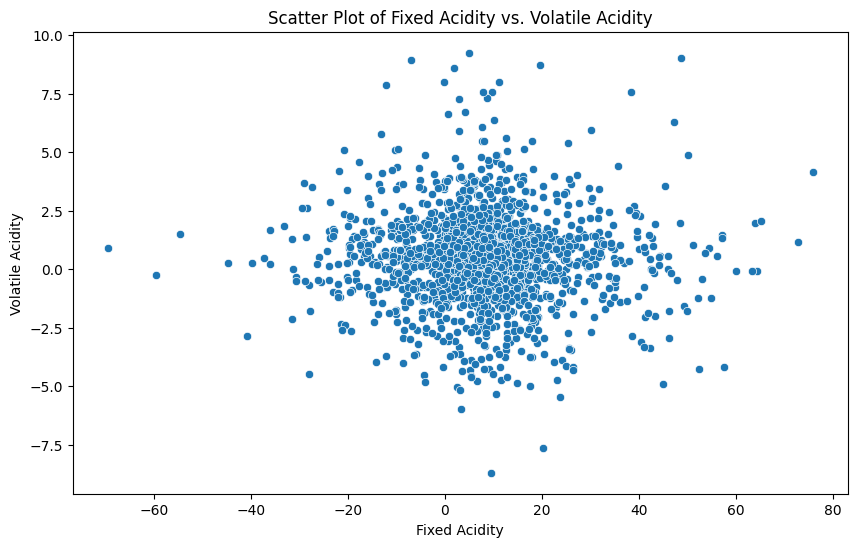

In [88]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fixed_acidity, y=volatile_acidity)
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Scatter Plot of Fixed Acidity vs. Volatile Acidity')
plt.show()

In [89]:
# Compute Silhouette Score
silhouette = silhouette_score(wine_data_scaled, labels)

# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(wine_data_scaled, labels)

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(wine_data_scaled, labels)

# Output performance metrics
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: -0.20832071431283475
Davies-Bouldin Index: 1.4732012596122097
Calinski-Harabasz Index: 3.763122078491478
